In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


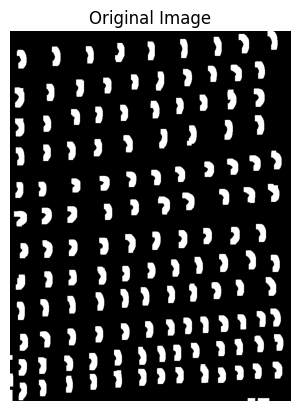

In [20]:
image = cv2.imread("../img/).jpg")
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.adaptiveThreshold(grayscale_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,75,15)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
thresh2=thresh_img.copy()
thresh_img = cv2.dilate(thresh_img, kernel, iterations=3)
height, width = image.shape[:2]
cv2.namedWindow("Original Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image", width, height)
cv2.imshow("Original Image", thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([thresh_img],["Original Image"])

In [21]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv2.contourArea(contour) < 2000:
        cv2.drawContours(grayscale_image, [contour], -1, (0), thickness=cv2.FILLED)

#cv2.drawContours(grayscale_image, contours, -1, (0,255,0), 3)


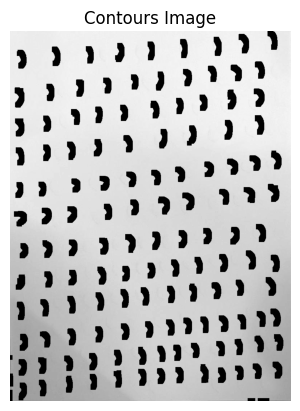

In [22]:
cv2.namedWindow("Contours Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Contours Image", width, height)
cv2.imshow("Contours Image", grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([grayscale_image],["Contours Image"])

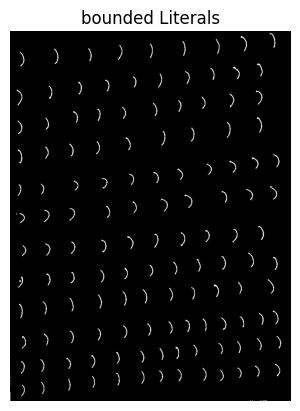

In [23]:
grayscale_image2 = cv2.cvtColor(cv2.imread("../img/m.png"), cv2.COLOR_BGR2GRAY)
grayscale_image2=thresh2.copy()
min_rectangle_area = 80
rectangles = np.array([cv2.boundingRect(c) for c in contours])
rectangles = [rect for rect in rectangles if rect[2] * rect[3] > min_rectangle_area]
# x=18
x_offset=18
y_offset=5 
for rect in rectangles:
    x, y, w, h = rect
    cv2.rectangle(grayscale_image2, (x-x_offset, y-y_offset-3), (x +x_offset +w, y + h+ y_offset -5), (0, 255, 0), 2)


cv2.namedWindow("bounded Literals", cv2.WINDOW_NORMAL)
cv2.resizeWindow("bounded Literals", width, height)
cv2.imshow("bounded Literals", grayscale_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()
show_images([grayscale_image2],["bounded Literals"])

[ 686 1016   32    8]


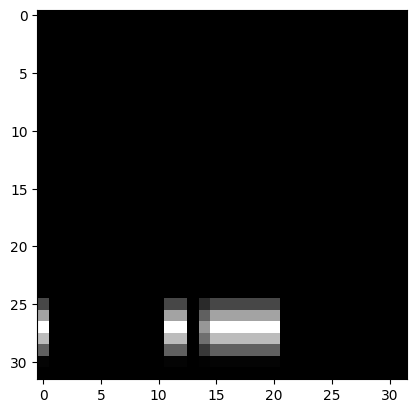

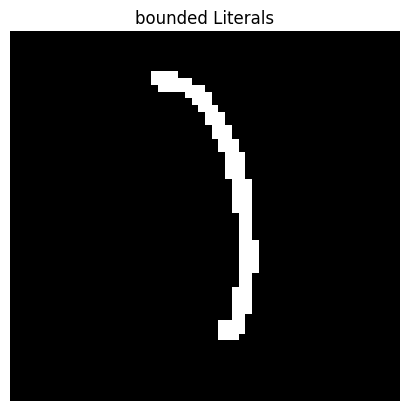

In [24]:
x, y, w, h = rectangles[0]
print(rectangles[0])
extracted_rectangle = grayscale_image2[y-y_offset+2:y+h+y_offset-2,  x-x_offset+3 if x >= 15 else 0:x+w+x_offset-3]

resized_rectangle = cv2.resize(extracted_rectangle, (32, 32))

cv2.namedWindow("bounded Literals", cv2.WINDOW_NORMAL)
cv2.resizeWindow("bounded Literals", 32, 32)
cv2.imshow("bounded Literals", resized_rectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(resized_rectangle)
cv2.imwrite("test.png",resized_rectangle)
i=0
for x, y, w, h in rectangles:
    extracted_rectangle = grayscale_image2[y - y_offset + 2 if y >= 7 else 0:y + h + y_offset - 2, x-x_offset+3 if x >= 15 else 0:x + w + x_offset - 3]
    resized_rectangle = cv2.resize(extracted_rectangle, (32, 32))
    cv2.imwrite(f"testset3/test{i}.png", resized_rectangle)
    i += 1
show_images([extracted_rectangle],["bounded Literals"])